Loading Libraries

Loading libraries and dataset

In [5]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(readr)
library(lubridate)
Adidas_data <- read_csv("Adidas_US_Sales_Datasets.csv")

Rows: 9648 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): Retailer, Invoice Date, Region, State, City, Product, Price per Un...
dbl  (2): Retailer ID, Units Sold

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(Adidas_data)

Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$600,000","$300,000",50%,In-store
Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$500,000","$150,000",30%,In-store
Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$400,000","$140,000",35%,In-store
Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,$50.00,1000,"$500,000","$125,000",25%,In-store


## Data Cleaning and Preprocessing

In [7]:
# Renaming the columns and Removing Symbols
Adidas_data_re <- Adidas_data %>%
  select(Retailer:`Sales Method`) %>%
  rename(Retailer_ID = `Retailer ID`,
		 Invoice_Date =`Invoice Date`,
		 Price_per_Unit =`Price per Unit`,
		 Units_Sold =`Units Sold`,
		 Total_Sales = `Total Sales`,
		 Operating_Profit = `Operating Profit`,
		 Operating_Margin = `Operating Margin`,
		 Sales_Method = `Sales Method`) %>%
 mutate(Price_per_Unit = gsub("\\$","",Price_per_Unit),
		Total_Sales = gsub("\\$|\\,", "",Total_Sales), 
		Operating_Profit = gsub("\\$|\\,", "",Operating_Profit),
		Operating_Margin = gsub("\\%","",Operating_Margin))
head(Adidas_data_re )

Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.00,1200,600000,300000,50,In-store
Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.00,1000,500000,150000,30,In-store
Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.00,1000,400000,140000,35,In-store
Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.00,850,382500,133875,35,In-store
Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.00,900,540000,162000,30,In-store
Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,50.00,1000,500000,125000,25,In-store


In [8]:
str(Adidas_data_re)

tibble [9,648 × 13] (S3: tbl_df/tbl/data.frame)
 $ Retailer        : chr [1:9648] "Foot Locker" "Foot Locker" "Foot Locker" "Foot Locker" ...
 $ Retailer_ID     : num [1:9648] 1185732 1185732 1185732 1185732 1185732 ...
 $ Invoice_Date    : chr [1:9648] "1/1/2020" "1/2/2020" "1/3/2020" "1/4/2020" ...
 $ Region          : chr [1:9648] "Northeast" "Northeast" "Northeast" "Northeast" ...
 $ State           : chr [1:9648] "New York" "New York" "New York" "New York" ...
 $ City            : chr [1:9648] "New York" "New York" "New York" "New York" ...
 $ Product         : chr [1:9648] "Men's Street Footwear" "Men's Athletic Footwear" "Women's Street Footwear" "Women's Athletic Footwear" ...
 $ Price_per_Unit  : chr [1:9648] "50.00" "50.00" "40.00" "45.00" ...
 $ Units_Sold      : num [1:9648] 1200 1000 1000 850 900 1000 1250 900 950 825 ...
 $ Total_Sales     : chr [1:9648] "600000" "500000" "400000" "382500" ...
 $ Operating_Profit: chr [1:9648] "300000" "150000" "140000" "133875" ...
 $ Op

In [9]:
Adidas_data_trans <- Adidas_data_re %>%
mutate(Total_Sales = as.numeric(Total_Sales),
         Operating_Margin = as.numeric(Operating_Margin),
         Operating_Profit = as.numeric(Operating_Profit),
         Units_Sold = as.numeric(Units_Sold),
	     Price_per_Unit = as.numeric(Price_per_Unit),
	     #Spilt the Invoice_Date column
         Invoice_Year = format(as.Date(Invoice_Date,"%m/%d/%Y"), "%Y"),
         Invoice_Month = format(as.Date(Invoice_Date,"%m/%d/%Y"), "%m"),
         Invoice_Day = format(as.Date(Invoice_Date,"%m/%d/%Y"), "%d"))

head(Adidas_data_trans)

Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method,Invoice_Year,Invoice_Month,Invoice_Day
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store,2020,01,01
Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store,2020,01,02
Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store,2020,01,03
Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store,2020,01,04
Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store,2020,01,05
Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,25,In-store,2020,01,06


In [10]:
str(Adidas_data_trans)

tibble [9,648 × 16] (S3: tbl_df/tbl/data.frame)
 $ Retailer        : chr [1:9648] "Foot Locker" "Foot Locker" "Foot Locker" "Foot Locker" ...
 $ Retailer_ID     : num [1:9648] 1185732 1185732 1185732 1185732 1185732 ...
 $ Invoice_Date    : chr [1:9648] "1/1/2020" "1/2/2020" "1/3/2020" "1/4/2020" ...
 $ Region          : chr [1:9648] "Northeast" "Northeast" "Northeast" "Northeast" ...
 $ State           : chr [1:9648] "New York" "New York" "New York" "New York" ...
 $ City            : chr [1:9648] "New York" "New York" "New York" "New York" ...
 $ Product         : chr [1:9648] "Men's Street Footwear" "Men's Athletic Footwear" "Women's Street Footwear" "Women's Athletic Footwear" ...
 $ Price_per_Unit  : num [1:9648] 50 50 40 45 60 50 50 50 40 45 ...
 $ Units_Sold      : num [1:9648] 1200 1000 1000 850 900 1000 1250 900 950 825 ...
 $ Total_Sales     : num [1:9648] 600000 500000 400000 382500 540000 ...
 $ Operating_Profit: num [1:9648] 300000 150000 140000 133875 162000 ...
 $ Operat

## Total sales by retailers

In [11]:

Sales_by_retailers <- Adidas_data_trans %>%
  select(Retailer,Total_Sales) %>%
  group_by(Retailer) %>%
  summarise(Total_Sales_Retail = sum(Total_Sales))
head(Sales_by_retailers)
	 


Retailer,Total_Sales_Retail
<chr>,<dbl>
Amazon,77698912
Foot Locker,220094720
Kohl's,102114753
Sports Direct,182470997
Walmart,74558410
West Gear,242964333



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“`label_number_si()` was deprecated in scales 1.2.0.
ℹ Please use the `scale_cut` argument of `label_number()` instead.”


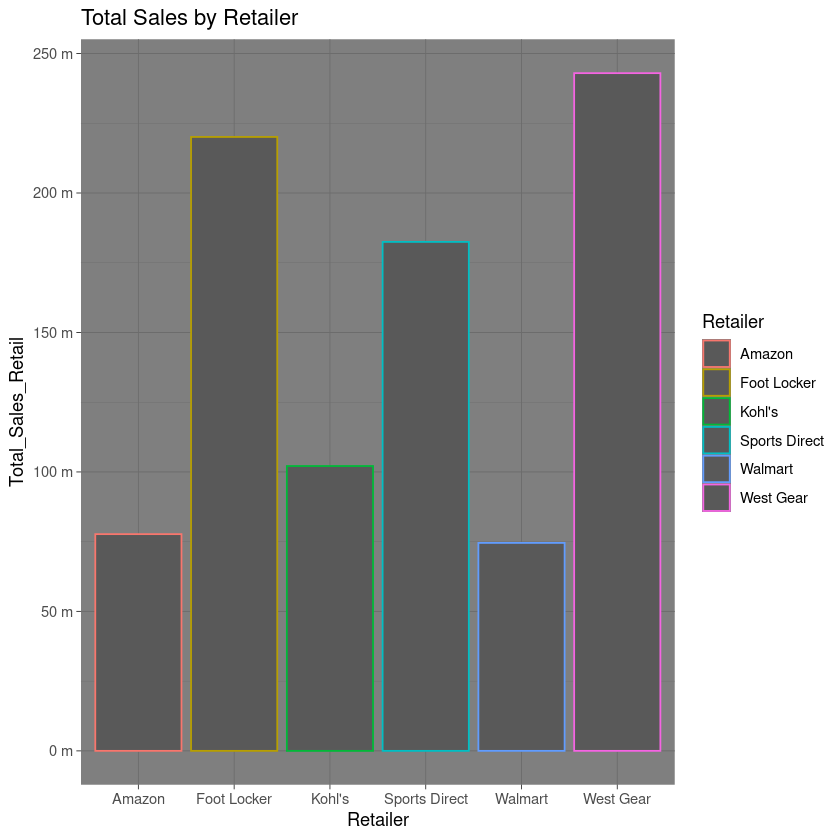

In [12]:
library(ggplot2)
library(scales)
ggplot(Sales_by_retailers, aes(x = Retailer, y = Total_Sales_Retail, color = Retailer)) + geom_col() + scale_y_continuous(labels = label_number_si(unit = "m", scale = 1e-6)) +
  labs(title = "Total Sales by Retailer", Y_axis = "Total Sales") + theme_dark()

## Total Profit of retailers

In [13]:
Profit_by_retailers <- Adidas_data_trans %>%
  select(Retailer,Operating_Profit) %>%
  group_by(Retailer) %>%
  summarise(Profit = sum(Operating_Profit))
head(Profit_by_retailers)

Retailer,Profit
<chr>,<dbl>
Amazon,28818533
Foot Locker,80722234
Kohl's,36811302
Sports Direct,74333022
Walmart,25782063
West Gear,85667968


## Total Sales by Product

In [14]:
Sales_by_Product <- Adidas_data_trans %>%
  select(Total_Sales,Product) %>%
  group_by(Product) %>%
  summarise(Product_sales = sum(Total_Sales))
head(Sales_by_Product)

Product,Product_sales
<chr>,<dbl>
Men's Apparel,123728632
Men's Athletic Footwear,153673680
Men's Street Footwear,208826244
Women's Apparel,179038860
Women's Athletic Footwear,106631896
Women's Street Footwear,128002813


In [15]:
head(Adidas_data_trans)

Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method,Invoice_Year,Invoice_Month,Invoice_Day
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store,2020,01,01
Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store,2020,01,02
Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store,2020,01,03
Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store,2020,01,04
Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store,2020,01,05
Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,25,In-store,2020,01,06


## What is the top sales method?

In [16]:
Method <-Adidas_data_trans %>%
select(Sales_Method,Total_Sales)%>%
group_by(Sales_Method)%>%
summarise(Value = sum(Total_Sales))

head(Method)


Sales_Method,Value
<chr>,<dbl>
In-store,356643750
Online,247672882
Outlet,295585493


## Average Price of Products Per Unit

In [17]:
Average_price<- Adidas_data_trans %>%
select(Price_per_Unit,Product) %>%
group_by(Product) %>%
summarise(Avg_Price_Per_Unit = mean(Price_per_Unit))

head(Average_price)

Product,Avg_Price_Per_Unit
<chr>,<dbl>
Men's Apparel,50.32192
Men's Athletic Footwear,43.77950
Men's Street Footwear,44.23665
Women's Apparel,51.60075
Women's Athletic Footwear,41.11270
Women's Street Footwear,40.25249


## Uncover the macro trends in sales

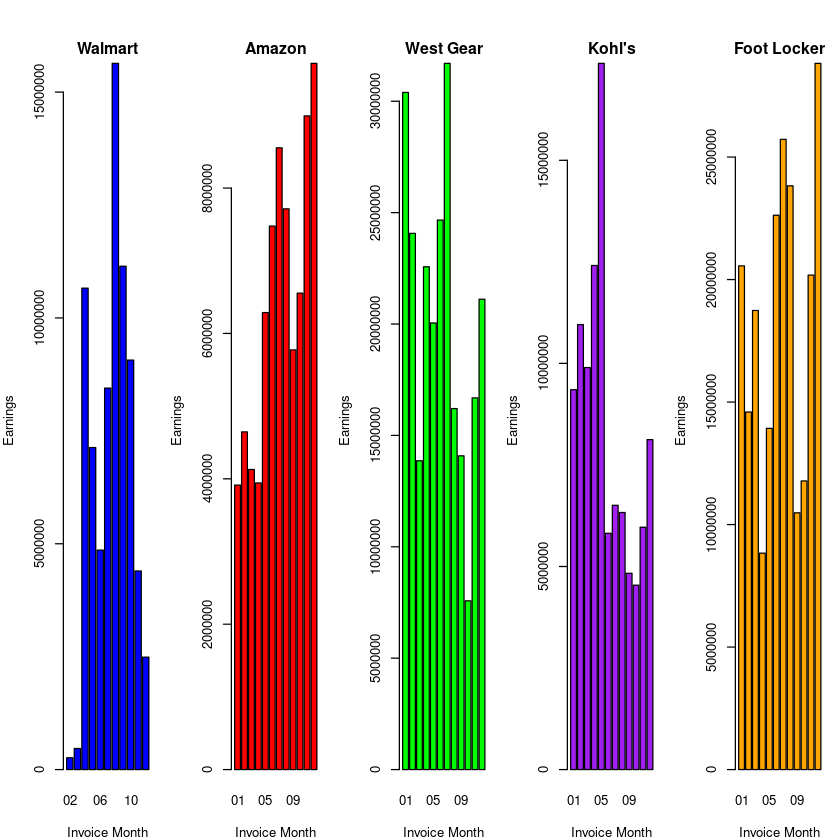

In [18]:
macro_trend <- aggregate(Total_Sales ~ Retailer + Invoice_Month, data = Adidas_data_trans, sum)

# Then, we create separate data frames for each retailer
walmart <- subset(macro_trend, Retailer == "Walmart")
xwalmart <- walmart$Invoice_Month
ywalmart <- walmart$Total_Sales

amazon <- subset(macro_trend, Retailer == "Amazon")
xamazon <- amazon$Invoice_Month
yamazon <- amazon$Total_Sales

westgear <- subset(macro_trend, Retailer == "West Gear")
xwestgear <- westgear$Invoice_Month
ywestgear <- westgear$Total_Sales

kohl <- subset(macro_trend, Retailer == "Kohl's")
xkohl <- kohl$Invoice_Month
ykohl <- kohl$Total_Sales

footlocker <- subset(macro_trend, Retailer == "Foot Locker")
xfl <- footlocker$Invoice_Month
yfl <- footlocker$Total_Sales


# Next, we create a plot with 5 subplots (one for each retailer)
par(mfrow = c(1, 5), mar = c(4, 4, 2, 1), oma = c(0, 0, 2, 0))
options(scipen = 999)

# Next, we create a plot with 5 subplots (one for each retailer)
par(mfrow = c(1, 5), mar = c(4, 4, 2, 1), oma = c(0, 0, 2, 0))
options(scipen = 999)

barplot(ywalmart, names.arg = xwalmart, col = "blue", xlab = "Invoice Month", ylab = "Earnings", main = "Walmart")
barplot(yamazon, names.arg = xamazon, col = "red", xlab = "Invoice Month", ylab = "Earnings", main = "Amazon")
barplot(ywestgear, names.arg = xwestgear, col = "green", xlab = "Invoice Month", ylab = "Earnings", main = "West Gear")
barplot(ykohl, names.arg = xkohl, col = "purple", xlab = "Invoice Month", ylab = "Earnings", main = "Kohl's")
barplot(yfl, names.arg = xfl, col = "orange", xlab = "Invoice Month", ylab = "Earnings", main = "Foot Locker")